Nama:

In [ ]:
print("Hanun Masitha Ramadhani")

(1) Import 'employee_missing.csv' menjadi DataFrame. Drop kolom yang tidak diperlukan dalam pembuatan model classifier. Subset kolom 'Attrition' dalam variabel y dan Subset kolom lainnya dalam variabel X.

In [17]:
import pandas as pd
df_employee = pd.read_csv('employee_missing.csv')
df_employee

,Unnamed: 0,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,...,1,80,0,8,0,1,6,4,0,5
1,1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,...,4,80,1,10,3,3,10,7,1,7
2,2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,...,2,80,0,7,3,3,0,0,0,0
3,3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,...,3,80,0,8,3,3,8,7,3,0
4,4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2935,2936,No,36,Travel_Frequently,884,Research & Development,23,2,Medical,...,3,80,1,17,3,3,5,2,0,3
2936,2936,2937,No,39,Travel_Rarely,613,Research & Development,6,1,Medical,...,1,80,1,9,5,3,7,7,1,7
2937,2937,2938,No,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,...,2,80,1,6,0,3,6,2,0,3
2938,2938,2939,No,49,Travel_Frequently,1023,Sales,2,3,Medical,...,4,80,0,17,3,2,9,6,0,8


In [18]:
df_employee.columns

Index(['Unnamed: 0', 'EmployeeNumber', 'Attrition', 'Age', 'BusinessTravel',
       'DailyRate', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [19]:
#saya menghapus kolom over 18 karena label yang ada pada over18 hanya ada 1. sehingga semua karyawan sudah lebih dari 18 
#tahun dan tidak akan berpengaruh pada proses klasifikasi

#saya juga menghapus kolon 'Unnamed: 0' dikarenakan isi dari kolom tersebut sama seperti EmployeeNumber

df_employee = df_employee.drop(["Over18", 'Unnamed: 0'], axis=1)
df_employee

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2936,No,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,...,3,80,1,17,3,3,5,2,0,3
2936,2937,No,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,...,1,80,1,9,5,3,7,7,1,7
2937,2938,No,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,...,2,80,1,6,0,3,6,2,0,3
2938,2939,No,49,Travel_Frequently,1023,Sales,2,3,Medical,4,...,4,80,0,17,3,2,9,6,0,8


In [20]:
y = df_employee['Attrition']
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
2935     No
2936     No
2937     No
2938     No
2939     No
Name: Attrition, Length: 2940, dtype: object

In [21]:
df_employee = df_employee.drop(["Attrition"], axis=1)
X = df_employee.copy()

(2) Split X dan y menjadi X_train, X_test, y_train, y_test dengan test size 0.2 dan pastikan rasio label pada y_train dan y_test seimbang.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify = y)

print("Jumlah Data Train : {0}".format(len(X_train)))
print("Jumlah Data Test : {0}".format(len(X_test)))

Jumlah Data Train : 2352
Jumlah Data Test : 588


In [24]:
y_train.value_counts()

No     1973
Yes     379
Name: Attrition, dtype: int64

In [25]:
y_test.value_counts()

No     493
Yes     95
Name: Attrition, dtype: int64

(3) Pada kolom numerik X_train lakukan: imputation dan scaling (metode bebas)

In [31]:
employee_number = X_train.select_dtypes(include = 'number')
employee_number

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
822,823,34,1003,2,2,4,95,3,2,3,...,4,80,0,5,3,2,3,2,0,2
1422,1423,35,1490,11,4,4,43,3,1,3,...,3,80,1,5,3,3,2,2,2,2
343,344,29,144,10,1,4,39,2,2,2,...,1,80,2,7,2,3,7,7,1,7
1642,1643,36,1480,3,2,4,30,3,1,2,...,3,80,0,13,3,2,8,7,7,2
2129,2130,28,821,5,4,1,98,3,2,4,...,2,80,0,4,3,3,4,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2554,2555,34,971,1,3,4,64,2,3,3,...,4,80,0,10,3,3,10,9,8,6
2219,2220,52,266,2,1,1,57,1,5,4,...,4,80,1,33,3,3,32,14,6,9
1658,1659,34,1069,2,1,4,45,2,2,3,...,3,80,0,10,2,2,10,9,1,9
1762,1763,31,444,5,3,4,84,3,1,2,...,3,80,1,2,5,2,2,2,2,2


<AxesSubplot:>

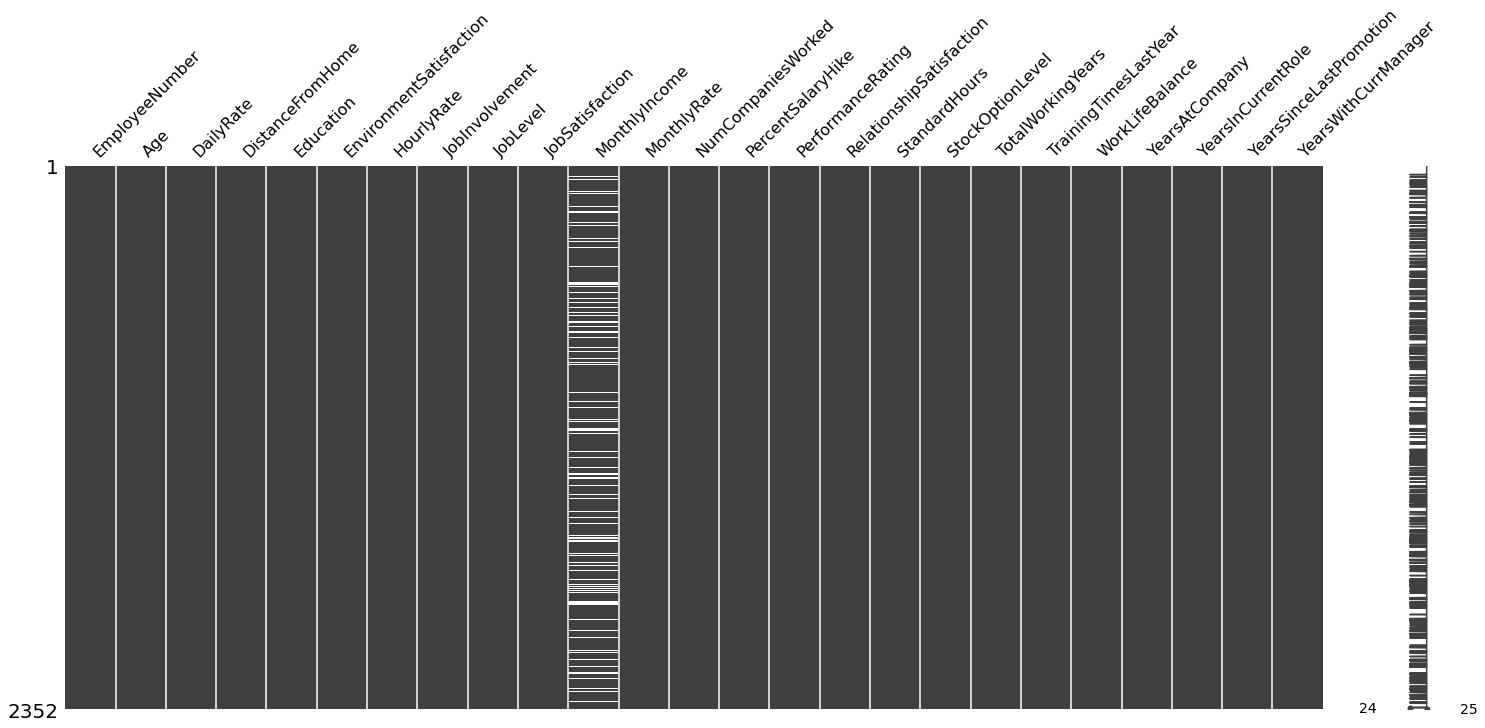

In [32]:
import missingno as msno

msno.matrix(employee_number) 

In [33]:
from sklearn.impute import KNNImputer

imputer_knn = KNNImputer(n_neighbors=5)
imputer_result = imputer_knn.fit_transform(employee_number)

In [35]:
imputer_result = pd.DataFrame(imputer_result)
imputer_result.columns = employee_number.columns

imputation on MonthlyIncome


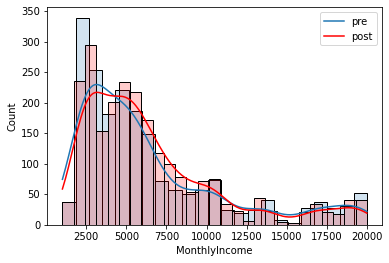

pre: mean: 6475.16894977169, std: 4681.725973689
post: mean: 6498.506717687075, std: 4366.661075948048


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print("imputation on MonthlyIncome")

sns.histplot(employee_number['MonthlyIncome'], alpha=0.2, kde=True)
sns.histplot(imputer_result['MonthlyIncome'], alpha=0.2, kde=True, color='red')
plt.legend(['pre', 'post'])
plt.show()
print('pre: mean: {}, std: {}'.format(np.mean(employee_number['MonthlyIncome']), 
                                      np.std(employee_number['MonthlyIncome'])))
print('post: mean: {}, std: {}'.format(np.mean(imputer_result['MonthlyIncome']), 
                                      np.std(imputer_result['MonthlyIncome'])))

In [37]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()
scaler_result = sscaler.fit_transform(imputer_result)

scaler_result = pd.DataFrame(scaler_result)
scaler_result.columns = employee_number.columns

scaler_result

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-0.757711,-0.315851,0.489538,-0.886156,-0.884696,1.165288,1.436933,0.360713,-0.056700,0.236964,...,1.196951,0.0,-0.925630,-0.809969,0.158317,-1.081181,-0.652643,-0.612123,-0.683037,-0.591124
1,-0.051320,-0.205369,1.699838,0.229736,1.065449,1.165288,-1.111280,0.360713,-0.963897,0.236964,...,0.274832,0.0,0.247367,-0.809969,0.158317,0.331562,-0.817185,-0.612123,-0.065032,-0.591124
2,-1.321646,-0.868262,-1.645262,0.105748,-1.859768,1.165288,-1.307297,-1.055641,-0.056700,-0.672236,...,-1.569406,0.0,1.420363,-0.549343,-0.615823,0.331562,0.005527,0.760601,-0.374035,0.809565
3,0.207690,-0.094887,1.674985,-0.762168,-0.884696,1.165288,-1.748334,0.360713,-0.963897,-0.672236,...,0.274832,0.0,-0.925630,0.232536,0.158317,-1.081181,0.170069,0.760601,1.479979,-0.591124
4,0.781044,-0.978744,0.037229,-0.514192,1.065449,-1.568180,1.583945,0.360713,-0.056700,1.146165,...,-0.647287,0.0,-0.925630,-0.940282,0.158317,0.331562,-0.488101,-0.612123,-0.683037,-0.591124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,1.281404,-0.315851,0.410011,-1.010144,0.090377,1.165288,-0.082194,-1.055641,0.850498,0.236964,...,1.196951,0.0,-0.925630,-0.158404,0.158317,0.331562,0.499154,1.309691,1.788981,0.529427
2348,0.887003,1.672828,-1.342066,-0.886156,-1.859768,-1.568180,-0.425223,-2.471995,2.664892,1.146165,...,1.196951,0.0,0.247367,2.838797,0.158317,0.331562,4.119087,2.682416,1.170976,1.369841
2349,0.226527,-0.315851,0.653562,-0.886156,-1.859768,1.165288,-1.013272,-1.055641,-0.056700,0.236964,...,0.274832,0.0,-0.925630,-0.158404,-0.615823,-1.081181,0.499154,1.309691,-0.374035,1.369841
2350,0.348968,-0.647298,-0.899698,-0.514192,0.090377,1.165288,0.897888,0.360713,-0.963897,-0.672236,...,0.274832,0.0,0.247367,-1.200908,1.706596,-1.081181,-0.817185,-0.612123,-0.065032,-0.591124


In [43]:
employee_number = scaler_result.copy()
employee_number

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-0.757711,-0.315851,0.489538,-0.886156,-0.884696,1.165288,1.436933,0.360713,-0.056700,0.236964,...,1.196951,0.0,-0.925630,-0.809969,0.158317,-1.081181,-0.652643,-0.612123,-0.683037,-0.591124
1,-0.051320,-0.205369,1.699838,0.229736,1.065449,1.165288,-1.111280,0.360713,-0.963897,0.236964,...,0.274832,0.0,0.247367,-0.809969,0.158317,0.331562,-0.817185,-0.612123,-0.065032,-0.591124
2,-1.321646,-0.868262,-1.645262,0.105748,-1.859768,1.165288,-1.307297,-1.055641,-0.056700,-0.672236,...,-1.569406,0.0,1.420363,-0.549343,-0.615823,0.331562,0.005527,0.760601,-0.374035,0.809565
3,0.207690,-0.094887,1.674985,-0.762168,-0.884696,1.165288,-1.748334,0.360713,-0.963897,-0.672236,...,0.274832,0.0,-0.925630,0.232536,0.158317,-1.081181,0.170069,0.760601,1.479979,-0.591124
4,0.781044,-0.978744,0.037229,-0.514192,1.065449,-1.568180,1.583945,0.360713,-0.056700,1.146165,...,-0.647287,0.0,-0.925630,-0.940282,0.158317,0.331562,-0.488101,-0.612123,-0.683037,-0.591124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,1.281404,-0.315851,0.410011,-1.010144,0.090377,1.165288,-0.082194,-1.055641,0.850498,0.236964,...,1.196951,0.0,-0.925630,-0.158404,0.158317,0.331562,0.499154,1.309691,1.788981,0.529427
2348,0.887003,1.672828,-1.342066,-0.886156,-1.859768,-1.568180,-0.425223,-2.471995,2.664892,1.146165,...,1.196951,0.0,0.247367,2.838797,0.158317,0.331562,4.119087,2.682416,1.170976,1.369841
2349,0.226527,-0.315851,0.653562,-0.886156,-1.859768,1.165288,-1.013272,-1.055641,-0.056700,0.236964,...,0.274832,0.0,-0.925630,-0.158404,-0.615823,-1.081181,0.499154,1.309691,-0.374035,1.369841
2350,0.348968,-0.647298,-0.899698,-0.514192,0.090377,1.165288,0.897888,0.360713,-0.963897,-0.672236,...,0.274832,0.0,0.247367,-1.200908,1.706596,-1.081181,-0.817185,-0.612123,-0.065032,-0.591124


(4) Pada kolom kategorikal X_train lakukan: imputation dan one hot encoding

In [53]:
employee_obj = X_train.select_dtypes(include = 'object')
employee_obj

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
822,Travel_Frequently,Research & Development,Life Sciences,Male,Manufacturing Director,Single,No
1422,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Yes
343,Travel_Rarely,Sales,Marketing,Female,Sales Executive,Divorced,Yes
1642,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Single,No
2129,Travel_Rarely,Sales,Medical,Male,NaN,Single,No
...,...,...,...,...,...,...,...
2554,Travel_Rarely,Sales,Technical Degree,Male,NaN,Married,Yes
2219,Travel_Rarely,Sales,Marketing,Female,Manager,Married,No
1658,Travel_Frequently,Research & Development,Life Sciences,Male,Manufacturing Director,Married,No
1762,Travel_Frequently,Sales,Marketing,Female,Sales Representative,Divorced,No


<AxesSubplot:>

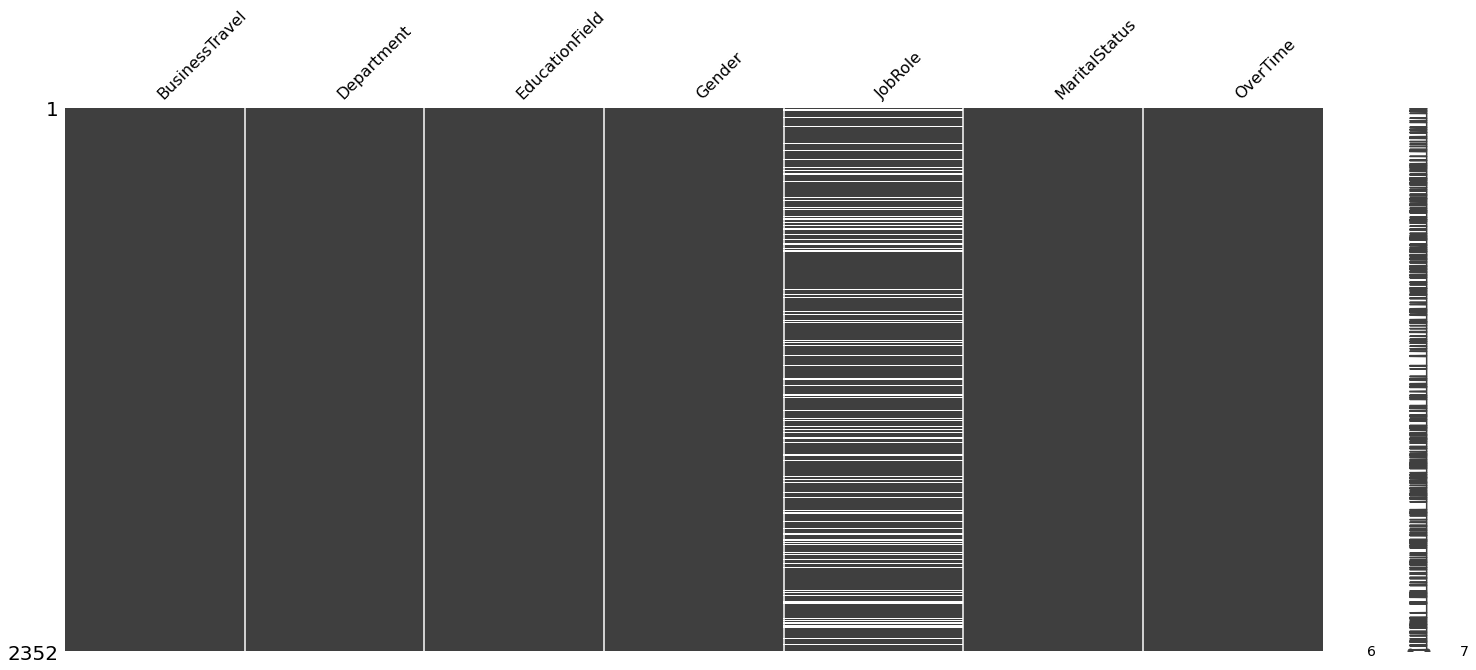

In [54]:
msno.matrix(employee_obj) 

In [55]:
from sklearn.impute import SimpleImputer 

impute = SimpleImputer(strategy = 'most_frequent')
imputer_result = impute.fit_transform(employee_obj)

imputer_result = pd.DataFrame(imputer_result)
imputer_result.columns = employee_obj.columns

imputation on JobRole


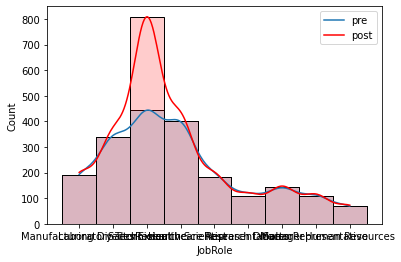

In [56]:
print("imputation on JobRole")

sns.histplot(employee_obj['JobRole'], alpha=0.2, kde=True)
sns.histplot(imputer_result['JobRole'], alpha=0.2, kde=True, color='red')
plt.legend(['pre', 'post'])
plt.show()

In [57]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=np.nan)
encoder_result = oe.fit_transform(imputer_result)

encoder_result = pd.DataFrame(encoder_result)
encoder_result.columns = employee_obj.columns
oe.categories_

[array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype=object),
 array(['Human Resources', 'Research & Development', 'Sales'], dtype=object),
 array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
        'Other', 'Technical Degree'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['Healthcare Representative', 'Human Resources',
        'Laboratory Technician', 'Manager', 'Manufacturing Director',
        'Research Director', 'Research Scientist', 'Sales Executive',
        'Sales Representative'], dtype=object),
 array(['Divorced', 'Married', 'Single'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [60]:
employee_obj = encoder_result.copy()

(5) Satukan hasil transformasi kolom numerik dan kategorikal X_train menjadi X_train_transformed

In [61]:
X_train_transformed = pd.concat([employee_number, employee_obj], axis=1)
X_train_transformed

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,-0.757711,-0.315851,0.489538,-0.886156,-0.884696,1.165288,1.436933,0.360713,-0.056700,0.236964,...,-0.612123,-0.683037,-0.591124,1.0,1.0,1.0,1.0,4.0,2.0,0.0
1,-0.051320,-0.205369,1.699838,0.229736,1.065449,1.165288,-1.111280,0.360713,-0.963897,0.236964,...,-0.612123,-0.065032,-0.591124,2.0,1.0,3.0,1.0,2.0,1.0,1.0
2,-1.321646,-0.868262,-1.645262,0.105748,-1.859768,1.165288,-1.307297,-1.055641,-0.056700,-0.672236,...,0.760601,-0.374035,0.809565,2.0,2.0,2.0,0.0,7.0,0.0,1.0
3,0.207690,-0.094887,1.674985,-0.762168,-0.884696,1.165288,-1.748334,0.360713,-0.963897,-0.672236,...,0.760601,1.479979,-0.591124,1.0,1.0,3.0,1.0,2.0,2.0,0.0
4,0.781044,-0.978744,0.037229,-0.514192,1.065449,-1.568180,1.583945,0.360713,-0.056700,1.146165,...,-0.612123,-0.683037,-0.591124,2.0,2.0,3.0,1.0,7.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,1.281404,-0.315851,0.410011,-1.010144,0.090377,1.165288,-0.082194,-1.055641,0.850498,0.236964,...,1.309691,1.788981,0.529427,2.0,2.0,5.0,1.0,7.0,1.0,1.0
2348,0.887003,1.672828,-1.342066,-0.886156,-1.859768,-1.568180,-0.425223,-2.471995,2.664892,1.146165,...,2.682416,1.170976,1.369841,2.0,2.0,2.0,0.0,3.0,1.0,0.0
2349,0.226527,-0.315851,0.653562,-0.886156,-1.859768,1.165288,-1.013272,-1.055641,-0.056700,0.236964,...,1.309691,-0.374035,1.369841,1.0,1.0,1.0,1.0,4.0,1.0,0.0
2350,0.348968,-0.647298,-0.899698,-0.514192,0.090377,1.165288,0.897888,0.360713,-0.963897,-0.672236,...,-0.612123,-0.065032,-0.591124,1.0,2.0,2.0,0.0,8.0,0.0,0.0


(6) Lakukan feature selection menggunakan salah satu atau beberapa metode selection yang Anda ketahui pada X_train_transformed menjadi X_train_final

In [63]:
from sklearn.feature_selection import mutual_info_classif

mutual_info_classif(X_train_transformed, y_train)
pd.DataFrame({'features': X_train_transformed.columns, 
             'mutual_info': mutual_info_classif(X_train_transformed, y_train)}).sort_values('mutual_info', ascending=False)

,features,mutual_info
11,MonthlyRate,0.090954
10,MonthlyIncome,0.084398
2,DailyRate,0.074187
1,Age,0.038027
31,OverTime,0.032600
8,JobLevel,0.030361
18,TotalWorkingYears,0.027670
24,YearsWithCurrManager,0.023710
29,JobRole,0.020879
7,JobInvolvement,0.018446


In [69]:
from sklearn.feature_selection import SelectKBest

kbest = SelectKBest(score_func = mutual_info_classif, k=10)
X_train_final = kbest.fit_transform(X_train_transformed, y_train)

X_train_final = pd.DataFrame(X_train_final)
X_train_final.columns = X_train_transformed.columns[kbest.get_support()]
X_train_final

,Age,DailyRate,JobLevel,MonthlyIncome,MonthlyRate,StockOptionLevel,TotalWorkingYears,YearsWithCurrManager,JobRole,OverTime
0,-0.315851,0.489538,-0.056700,-0.564621,0.217565,-0.925630,-0.809969,-0.591124,4.0,0.0
1,-0.205369,1.699838,-0.963897,-0.879048,0.837192,0.247367,-0.809969,-0.591124,2.0,1.0
2,-0.868262,-1.645262,-0.056700,0.405228,-0.341480,1.420363,-0.549343,0.809565,7.0,1.0
3,-0.094887,1.674985,-0.963897,-1.010041,0.108800,-0.925630,0.232536,-0.591124,2.0,0.0
4,-0.978744,0.037229,-0.056700,-0.364239,1.403564,-0.925630,-0.940282,-0.591124,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2347,-0.315851,0.410011,0.850498,0.133854,-0.282025,-0.925630,-0.158404,0.529427,7.0,1.0
2348,1.672828,-1.342066,2.664892,3.056453,1.628140,0.247367,2.838797,1.369841,3.0,0.0
2349,-0.315851,0.653562,-0.056700,0.698129,-0.030398,-0.925630,-0.158404,1.369841,4.0,0.0
2350,-0.647298,-0.899698,-0.963897,-0.849506,-1.462528,0.247367,-1.200908,-0.591124,8.0,0.0


(7) Lakukan semua step transformasi dan seleksi yang Anda lakukan pada X_train terhadap X_test simpan hasil akhirnya pada X_test_final

imputation on MonthlyIncome


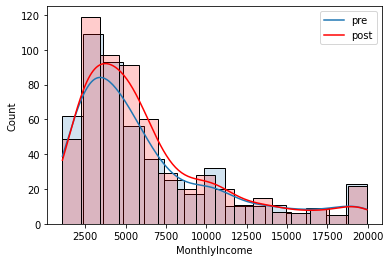

pre: mean: 6431.297029702971, std: 4716.318278682298
post: mean: 6402.994897959184, std: 4462.11830348857


In [71]:
employee_number = X_test.select_dtypes(include = 'number')

imputer_knn = KNNImputer(n_neighbors=5)
imputer_result = imputer_knn.fit_transform(employee_number)

imputer_result = pd.DataFrame(imputer_result)
imputer_result.columns = employee_number.columns

print("imputation on MonthlyIncome")

sns.histplot(employee_number['MonthlyIncome'], alpha=0.2, kde=True)
sns.histplot(imputer_result['MonthlyIncome'], alpha=0.2, kde=True, color='red')
plt.legend(['pre', 'post'])
plt.show()
print('pre: mean: {}, std: {}'.format(np.mean(employee_number['MonthlyIncome']), 
                                      np.std(employee_number['MonthlyIncome'])))
print('post: mean: {}, std: {}'.format(np.mean(imputer_result['MonthlyIncome']), 
                                      np.std(imputer_result['MonthlyIncome'])))

sscaler = StandardScaler()
scaler_result = sscaler.fit_transform(imputer_result)

scaler_result = pd.DataFrame(scaler_result)
scaler_result.columns = employee_number.columns

employee_number = scaler_result.copy()

imputation on JobRole


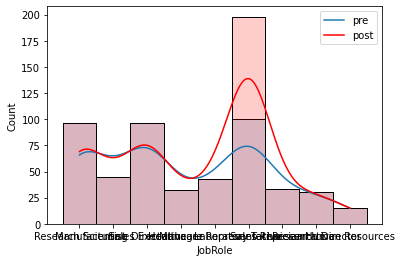

In [72]:
employee_obj = X_test.select_dtypes(include = 'object')

impute = SimpleImputer(strategy = 'most_frequent')
imputer_result = impute.fit_transform(employee_obj)

imputer_result = pd.DataFrame(imputer_result)
imputer_result.columns = employee_obj.columns

print("imputation on JobRole")

sns.histplot(employee_obj['JobRole'], alpha=0.2, kde=True)
sns.histplot(imputer_result['JobRole'], alpha=0.2, kde=True, color='red')
plt.legend(['pre', 'post'])
plt.show()

oe = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=np.nan)
encoder_result = oe.fit_transform(imputer_result)

encoder_result = pd.DataFrame(encoder_result)
encoder_result.columns = employee_obj.columns

employee_obj = encoder_result.copy()

In [78]:
X_test_transformed = pd.concat([employee_number, employee_obj], axis=1)
X_test_transformed

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,0.390007,-1.501715,1.279211,2.014024,-1.903990,0.256693,0.814286,0.455028,-0.952179,1.182456,...,-0.629566,-0.663705,-0.611788,2.0,1.0,1.0,1.0,6.0,0.0,0.0
1,0.718695,-0.760581,0.549499,-0.529876,1.047362,-0.675008,0.413491,-0.917056,-0.952179,1.182456,...,-0.064398,-0.663705,-0.330528,1.0,1.0,1.0,1.0,6.0,0.0,0.0
2,1.197540,0.404058,1.215331,-0.529876,2.031146,-0.675008,1.164982,1.827112,-0.952179,0.282994,...,-0.629566,-0.663705,-0.330528,2.0,1.0,3.0,1.0,6.0,1.0,1.0
3,1.127782,1.145192,0.163759,-0.651014,0.063578,1.188394,-0.638597,0.455028,0.828048,1.182456,...,1.348522,-0.663705,1.075771,2.0,1.0,1.0,1.0,4.0,2.0,0.0
4,0.315520,-0.866457,-0.850959,-0.893290,-0.920206,-0.675008,-1.139592,0.455028,-0.062066,1.182456,...,0.783354,-0.663705,1.357031,1.0,2.0,1.0,1.0,7.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,-0.966128,-0.972333,0.507731,-0.045324,0.063578,0.256693,0.513690,0.455028,-0.952179,0.282994,...,-0.629566,-0.030682,-0.611788,2.0,1.0,3.0,0.0,6.0,0.0,0.0
584,-0.045091,-0.125323,-1.197388,0.681505,1.047362,1.188394,1.064784,-2.289140,-0.062066,1.182456,...,2.196274,2.817918,1.919551,0.0,2.0,2.0,1.0,7.0,0.0,0.0
585,-0.866812,-0.125323,0.237467,0.802643,1.047362,0.256693,-1.189691,1.827112,-0.952179,-1.515930,...,2.478858,4.083963,2.763331,2.0,1.0,1.0,0.0,2.0,2.0,0.0
586,0.705689,-0.972333,-0.069651,-0.893290,1.047362,-0.675008,0.714087,0.455028,-0.062066,-0.616468,...,0.783354,1.551874,0.231992,2.0,2.0,2.0,0.0,7.0,1.0,1.0


In [81]:
X_test_final = kbest.transform(X_test_transformed)

X_test_final = pd.DataFrame(X_test_final)
X_test_final.columns = X_train_transformed.columns[kbest.get_support()]
X_test_final

,Age,DailyRate,JobLevel,MonthlyIncome,MonthlyRate,StockOptionLevel,TotalWorkingYears,YearsWithCurrManager,JobRole,OverTime
0,-1.501715,1.279211,-0.952179,-0.784156,0.234610,1.398879,-0.921567,-0.611788,6.0,0.0
1,-0.760581,0.549499,-0.952179,-0.592094,-1.674953,0.220454,-0.187808,-0.330528,6.0,0.0
2,0.404058,1.215331,-0.952179,-0.958288,-1.231212,-0.957972,-0.554687,-0.330528,6.0,1.0
3,1.145192,0.163759,0.828048,0.262836,0.598456,-0.957972,-0.065514,1.075771,4.0,0.0
4,-0.866457,-0.850959,-0.062066,-0.414376,0.814759,-0.957972,-0.187808,1.357031,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...
583,-0.972333,0.507731,-0.952179,-0.494204,-0.636448,0.220454,-0.676981,-0.611788,6.0,0.0
584,-0.125323,-1.197388,-0.062066,-0.223435,-0.552655,0.220454,0.423659,1.919551,7.0,0.0
585,-0.125323,0.237467,-0.952179,-0.820237,-0.854282,-0.957972,0.790539,2.763331,2.0,0.0
586,-0.972333,-0.069651,-0.062066,-0.363952,-1.490525,-0.957972,-0.432394,0.231992,7.0,1.0


(8) Print 5 row pertama dan atribut shape dari X_train_final, 
X_test_final, y_train, y_test

In [82]:
X_train_final.head(5)

,Age,DailyRate,JobLevel,MonthlyIncome,MonthlyRate,StockOptionLevel,TotalWorkingYears,YearsWithCurrManager,JobRole,OverTime
0,-0.315851,0.489538,-0.056700,-0.564621,0.217565,-0.925630,-0.809969,-0.591124,4.0,0.0
1,-0.205369,1.699838,-0.963897,-0.879048,0.837192,0.247367,-0.809969,-0.591124,2.0,1.0
2,-0.868262,-1.645262,-0.056700,0.405228,-0.341480,1.420363,-0.549343,0.809565,7.0,1.0
3,-0.094887,1.674985,-0.963897,-1.010041,0.108800,-0.925630,0.232536,-0.591124,2.0,0.0
4,-0.978744,0.037229,-0.056700,-0.364239,1.403564,-0.925630,-0.940282,-0.591124,7.0,0.0


In [86]:
X_test_final.head(5)

,Age,DailyRate,JobLevel,MonthlyIncome,MonthlyRate,StockOptionLevel,TotalWorkingYears,YearsWithCurrManager,JobRole,OverTime
0,-1.501715,1.279211,-0.952179,-0.784156,0.234610,1.398879,-0.921567,-0.611788,6.0,0.0
1,-0.760581,0.549499,-0.952179,-0.592094,-1.674953,0.220454,-0.187808,-0.330528,6.0,0.0
2,0.404058,1.215331,-0.952179,-0.958288,-1.231212,-0.957972,-0.554687,-0.330528,6.0,1.0
3,1.145192,0.163759,0.828048,0.262836,0.598456,-0.957972,-0.065514,1.075771,4.0,0.0
4,-0.866457,-0.850959,-0.062066,-0.414376,0.814759,-0.957972,-0.187808,1.357031,7.0,0.0


In [87]:
y_train.head(5)

822     No
1422    No
343     No
1642    No
2129    No
Name: Attrition, dtype: object

In [88]:
y_test.head(5)

1815    No
2093    No
2498    No
2439    No
1752    No
Name: Attrition, dtype: object